# Estudo - Dados do Titanic

O famoso navio Titanic, que em sua viagem de inauguração em 14 de Abril de 1912, afundou após ter colidido com um iceberg, um navio grandioso e ousado para época e que seus construtores e projetistas o achavam indestrutivel.

### Informações obtidas

Nesse estudo, obtivemos o arquivo `titanic-data-6.csv`, com algumas informações de passageiros que embarcaram nessa viagem. 
Nela temos os seguintes dados :


 - _**Survived**_ - Indicação se o passgeiro sobreviveu ao acidente
 - _**PClass**_ - A qual classe do navio pertencia esse passageiro
 - _**Name**_ - Nome do passageiro
 - _**Sex**_ - Sexo do passageiro
 - _**Age**_ - Idade do passageiro
 - _**SibSp**_ - Número de parentes a bordo
 - _**Parch**_  - Número de pais/filhos a bordo
 - _**Ticket**_ - Número da passagem
 - _**Fare**_ - Tarifa paga
 - _**Cabine**_ - Cabine a qual o passageiro estava
 - _**Embarked**_ - Porto de embarque

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("titanic-data-6.csv")

_Primeiramente, iremos limpar os dados para garantir uma avaliação mais precisa,_
<br/>
_preencher valores faltantes com a média, neste caso das idades_

In [17]:
am = df['Age'].mean()
df['Age'].fillna(am,inplace=True)

_Agora ajustamos as cabines que estão nulas para N/I_

In [18]:
df['Cabin'].fillna('N/I',inplace=True)

E por fim assumimos que embarques que não estejam marcados, aconteceram em Southampton

In [19]:
df['Embarked'].fillna('S',inplace=True)

In [4]:
"""
    Função que calcula Média

    INPUT:
    df: dataframe que será utilizada
    column: str. Nome da coluna que será realizada query
    result_col: str. Nome da coluna a qual a média será calculada
    parameter: str. Parâmetro que será utilizado na condição da query

    OUTPUT:
    Imprimi a média da coluna solicitada de acordo com o parametro informado
"""
def calcula_media(df, column, result_col, parameter):
    return round(df.query("{} == {}".format(column,parameter))[result_col].mean(),2)

### O que pretendo

Reponder algumas das perguntas abaixo, nas quais possam nos ajudar com alguns fatos interessantes sobre esse grande acontecimento.

In [5]:
idade_media_sobreviventes = calcula_media(df,"Survived","Age",1)
idade_media_nao_sobreviventes = calcula_media(df,"Survived","Age",0)

In [6]:
total_passageiros = df["PassengerId"].count()
sobreviventes = df.query("Survived == '1'")["PassengerId"].count()
nao_sobreviventes = df.query("Survived == '0'")["PassengerId"].count()
quantidade_mulheres = df.query("Sex == 'female'")["Sex"].count()
quantidade_homens = df.query("Sex == 'male'")["Sex"].count()


#### Perguntas que podemos responder

1. **Qual o total de passageiros desse estudo?** 
2. **Qual a idade média dos passageiros?**
3. **Quais as quantidades de homens e mulheres**
4. **Quantos foram os sobreviventes e os que faleceram no acidente?**
5. **Qual a idade média dos sobreviventes?**
6. **Qual a quantidade de homens e mulheres que sobreviveram ao acidente ?**
7. **Qual a quantidade de sobreviventes por classes ?**
8. **Quais portos em que os sobreviventes entraram no navio ?**
9. **Qual a média de tafira paga ?**
10. **Qual a média de tafira paga entre os sobreviventes?**
11. **Gráfico que exibe a mortabilidade por gênero**


### Vamos as respostas

###### 1. Qual o total de passageiros desse estudo ?

In [7]:
 print("Para o estudo possuímos dados de {} passageiros".format(total_passageiros))

Para o estudo possuímos dados de 891 passageiros


###### 2. Qual a idade média dos passageiros ?

In [8]:
 print(round(df["Age"].mean(),2))

29.7


#### 3. Quais as quantidades de homens e mulheres? 

In [9]:
print("Respectivamente {} e {}".format(quantidade_homens,quantidade_mulheres))

Respectivamente 577 e 314


In [10]:
df_survivals = df.query("Survived == 1")

###### 4. Quantos foram os sobreviventes e os que faleceram no acidente ?

In [11]:
print("{} sobreviveram e {} não sobreviveram o acidente".format(sobreviventes,nao_sobreviventes))

342 sobreviveram e 549 não sobreviveram o acidente


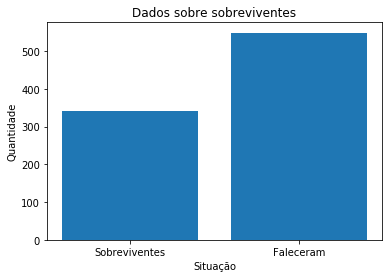

In [15]:
locations = [1, 2]
heights = [sobreviventes, nao_sobreviventes]
labels = ['Sobreviventes', 'Faleceram']
plt.bar(locations, heights, tick_label=labels)
plt.title('Dados sobre sobreviventes')
plt.xlabel('Situação', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.show(block=True)

Como podemos ver no gráfico acima, houve um grande número de passageiros que faleceram 61% e 39% sobreviveram nesses dados do estudo.

#### 5. Qual a idade média dos sobreviventes ?

In [16]:
print("A idade média dos sobreviventes é de {} e dos que faleceram é de {}".format(idade_media_sobreviventes,idade_media_nao_sobreviventes))

A idade média dos sobreviventes é de 28.55 e dos que faleceram é de 30.42


#### 6. Qual a quantidade de homens e mulheres que sobreviveram ao acidente ?

In [17]:
quantidade_sobreviventes_mulheres = df_survivals.query("Sex == 'female'")["Sex"].count()
quantidade_sobreviventes_homens = df_survivals.query("Sex == 'male'")["Sex"].count()

print("Respectivamente {} e {}".format(quantidade_sobreviventes_homens,quantidade_sobreviventes_mulheres))

Respectivamente 109 e 233


#### 7. Qual a quantidade de sobreviventes por classes ?

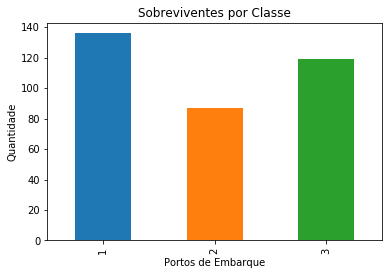

In [18]:

ax = df_survivals.groupby(['Pclass'])['Pclass'].count().plot(kind="bar", title="Sobreviventes por Classe");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");

No gráfico acima, podemos verificar que  houveram sobreviventes de todas as classes do navio, e que predominou sobreviventes da primeira classe e que surpreendentemente, a classe mais baixa tiveram mais sobreviventes que a 2ª.

#### 8. Quais portos em que os sobreviventes entraram no navio ? 

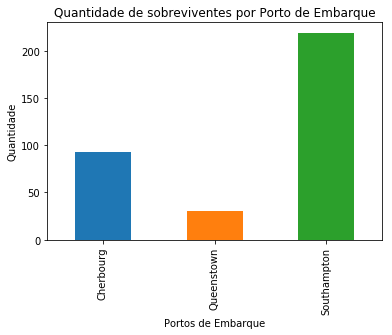

In [19]:
ax = df_survivals.replace('C','Cherbourg').replace('Q','Queenstown').replace('S','Southampton').groupby(['Embarked'])['Embarked'].count().plot(kind="bar",title="Quantidade de sobreviventes por Porto de Embarque");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");

Assim, podemos concluir que a maior parte dos passgeiros que sobreviveram o desastre, embarcaram em Southampton.

#### 9. Qual a média de tafira paga ?

In [20]:
print(round(df["Fare"].mean(),2))

32.2


#### 10. Qual a média de tafira paga entre os sobreviventes?

In [21]:
print(round(df_survivals["Fare"].mean(),2))

48.4


#### 11. Gráfico que exibe a mortabilidade por gênero

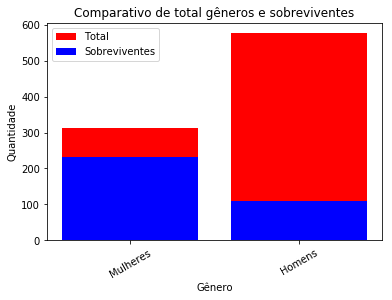

In [53]:
label = ['Mulheres', 'Homens']
label_legend = ['Total', 'Sobreviventes']
values = [quantidade_mulheres,quantidade_homens]
values_sobreviventes = [quantidade_sobreviventes_mulheres,quantidade_sobreviventes_homens ]

index = np.arange(len(label))

plt.bar(index, values, width = 0.8, color= 'red')
plt.bar(index, values_sobreviventes, width = 0.8, color= 'blue')
plt.xlabel('Gênero', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Comparativo de total gêneros e sobreviventes')
plt.legend(label_legend)
plt.show()

Neste gráfico, temos a comparação entre os homens e mulheres que estavam no navio com a quantidade de homens e mulheres que sobreviveram ao acidente, com isso concluímos que na viagem tinham muito mais homens do que mulheres no navio, já após o acidente esse numero mudou muito sobrevivendo mais mulheres.

# Conclusões

Pelo que podemos ver a maioria dos passageiros eram jovens, e haviam muito mais homens do que mulheres, porém ao verificarmos a quantidade de sobreviventes vemos que a grande maioria que sobreviveu foi o de mulheres, e que o sobreviventes foram de todas as classes do navio. 

Quando falamos que são jovens é porque a idade média dos passegeiros era de 30 anos.

Além disso obtivemos também as medias de valores pagos entre todos passageiros que foi de £32.2 e já quando fazemos sobreviventes essa média entre os sobreviventes esse número sobe para £42.4 .

E uma curiosidade, que a maior parte dos passageiros que sobreviveram embarcaram no navio no Porto de Southampton.

## Limitações

No momento da análise dos dados, foi verificado que algumas das propriedades possuiam valores nulos, no caso foram as propriedades `Age`,`Cabin` e `Embarked` e foram adotados os seguintes procedimentos para ajustar as informações:

- **Age:**  Adotamos as médias de idades para os valores que estavam como nulos.
- **Cabin:** Como não poderiamos garantir com certeza qual a cabine em que estava o passgeiro, quando a informação é nula                    incluímos a string 'N/I' ('não informado').
- **Embarked:** O local de embarque, foi preenchido com o mesmo valor que possuía o maior número de embarques da amostra.

##### -------------------------------------------------------

_**Autor:**_ Thiago Santos
<br/>
_**Data**_ : 21/11/2018